In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import ast
import numpy as np


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score

In [ ]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
file_path = 'gdrive/My Drive/Preferences/data_500_2.csv' #second dataset has more randomness

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#df = pd.read_csv(file_path)
df = pd.read_csv(file_path, converters={'Calendar': from_np_array})

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
def convert(array):
  out = []
  for list in array:
    # Converting integer list to string list
    s = [str(int(i)) for i in list]
    # Join list items using join()
    res = "".join(s)
    out.append(res)

      
  return(out)

In [ ]:
df['string'] =  df.apply(lambda x: str(x['Calendar']), axis=1)
df['lbl_concat'] =  df.apply(lambda x: x['lbl_concat']-1, axis=1)
df['cal_flat'] =  df.apply(lambda x: x['Calendar'].flatten(), axis=1)

In [ ]:
columns = ['Week','Day','b2b','lbl_concat']
df_copy = df.copy()
df_lookup = df_copy[columns].head(18)

In [ ]:
df_lookup = df_lookup.replace(np.nan, 'None')


In [ ]:
df_lookup

,Week,Day,b2b,lbl_concat
0,early,early,True,0
1,early,early,False,1
2,early,late,True,2
3,early,late,False,3
4,early,None,True,4
5,early,None,False,5
6,late,early,True,6
7,late,early,False,7
8,late,late,True,8
9,late,late,False,9


In [ ]:
# df_lookup.to_csv('lookup.csv')
# !cp lookup.csv "gdrive/My Drive/Preferences"

In [ ]:
print('Sum of duplicates:')
print(df.string.duplicated().sum())

Sum of duplicates:
0


In [ ]:
df = df.drop_duplicates(subset=['string'])

In [ ]:
df.string.duplicated().sum()

0

In [ ]:
counts = []
for i in range(18):
  counts.append(df[df['lbl_concat']==i+1]['Calendar'].count())

In [ ]:
#shuffle dataset
df = df.sample(frac=1)

In [ ]:
 df['String_cal'] = df.apply(lambda x: convert(x['Calendar']), axis=1)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.1)

In [ ]:
counts_train = []
counts_test = []
for i in range(18):
  counts_train.append(train_df[train_df['lbl_concat']==i+1]['Calendar'].count())
  counts_test.append(test_df[test_df['lbl_concat']==i+1]['Calendar'].count())


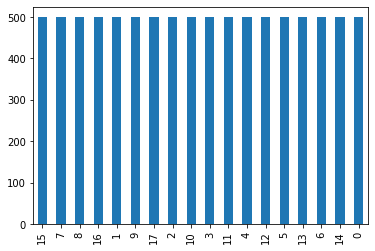

In [ ]:
df['lbl_concat'].value_counts().plot(kind='bar')


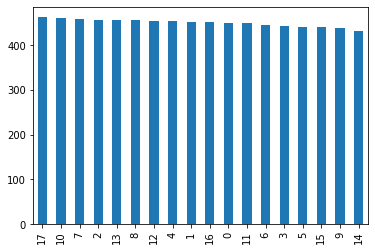

In [ ]:
train_df['lbl_concat'].value_counts().plot(kind='bar')

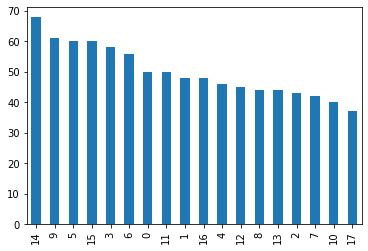

In [ ]:
test_df['lbl_concat'].value_counts().plot(kind='bar')

In [ ]:
df = df.drop(columns=['string'])

In [ ]:
df.head(2)

,Calendar,Week,Day,b2b,lbl_concat,label,cal_flat,String_cal
3758,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,late,True,14,"[0, 2, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[000000000000000000000000, 0000000000000000110..."
6144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",late,early,True,6,"[2, 1, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[000000000000000000000000, 0000100000000000000..."


In [ ]:
train_df['Calendar']

611     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3343    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6659    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2901    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4413    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                              ...                        
6931    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4603    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5975    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
8984    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
8050    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: Calendar, Length: 8100, dtype: object

In [ ]:
x_train = train_df['Calendar']
y_train = train_df['lbl_concat']

x_test = test_df['Calendar']
y_test = test_df['lbl_concat']

In [ ]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
xtrain = torch.FloatTensor(x_train_np.tolist())
ytrain = torch.FloatTensor(y_train_np.tolist())

xtest = torch.FloatTensor(x_test_np.tolist())
ytest = torch.FloatTensor(y_test_np.tolist())

In [ ]:
# hyperparameters
output_size = 18 #0-17 (classes)
epochs = 20
batch_size = 32
learning_rate = 0.001


Define Model:

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,16,3, padding= 1) #1x7x24 -> 16x7x24
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, (5, 7)) #16x7X24 -> 32x3x18 = 1728
        self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(1728, 84) #linear layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 18)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.bn1(x)
        x = F.relu(self.conv2(x))
        x = self.bn2(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(5, 7), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1728, out_features=84, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=18, bias=True)
)


In [ ]:
optimizer = optim.SGD(model.parameters(), learning_rate, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [ ]:
xtrain[0].unsqueeze(0)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
          0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
          1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]]])

In [ ]:
def get_acc(y_pred, actual):
  denom = y_pred.shape[0]
  out = np.sum(y_pred == actual)/denom*100
  return out

Train Model:

In [ ]:
loss_log = []
train_acc = []

loss_avg_lst = []
acc_avg_lst = []
add_every = 100

#per epoch
for epoch in range(epochs):
  loss_total = 0
  acc_total = 0
  step = 0
  #per item in batch:

  for i in range(0, xtrain.shape[0], batch_size):

    step+=1
    x_batch = xtrain[i:i + batch_size] 
    y_batch = ytrain[i:i + batch_size] 
    x_var = Variable(x_batch)
    y_var = Variable(y_batch).type(torch.LongTensor)
    optimizer.zero_grad()
    net_out = model(x_var.unsqueeze(1))
    y_pred = torch.max(net_out.data, 1)[1].numpy()
    actual = y_batch.numpy()
    accuracy = get_acc(y_pred, actual)
    loss = criterion(net_out, y_var)

    loss_total += loss.item()
    acc_total += accuracy

    loss.backward()
    optimizer.step()

    if i % add_every == 0:
      loss_log.append(loss.item())
      train_acc.append(accuracy)
    

  acc_avg = acc_total/step
  loss_avg = loss_total/step

  loss_avg_lst.append(loss_avg)
  acc_avg_lst.append(acc_avg)



  print('Epoch: {}/{} | Train Loss: {:.4f} | Train Acc: {:.2f} '.format(epoch, epochs, loss_avg, acc_avg))


Epoch: 0/20 | Train Loss: 1.3382 | Train Acc: 62.36 
Epoch: 1/20 | Train Loss: 0.3271 | Train Acc: 91.19 
Epoch: 2/20 | Train Loss: 0.2118 | Train Acc: 93.68 
Epoch: 3/20 | Train Loss: 0.1709 | Train Acc: 94.73 
Epoch: 4/20 | Train Loss: 0.1465 | Train Acc: 95.57 
Epoch: 5/20 | Train Loss: 0.1289 | Train Acc: 96.16 
Epoch: 6/20 | Train Loss: 0.1153 | Train Acc: 96.65 
Epoch: 7/20 | Train Loss: 0.1044 | Train Acc: 97.11 
Epoch: 8/20 | Train Loss: 0.0956 | Train Acc: 97.45 
Epoch: 9/20 | Train Loss: 0.0879 | Train Acc: 97.74 
Epoch: 10/20 | Train Loss: 0.0811 | Train Acc: 97.93 
Epoch: 11/20 | Train Loss: 0.0749 | Train Acc: 98.17 
Epoch: 12/20 | Train Loss: 0.0694 | Train Acc: 98.29 
Epoch: 13/20 | Train Loss: 0.0643 | Train Acc: 98.44 
Epoch: 14/20 | Train Loss: 0.0594 | Train Acc: 98.55 
Epoch: 15/20 | Train Loss: 0.0548 | Train Acc: 98.71 
Epoch: 16/20 | Train Loss: 0.0504 | Train Acc: 98.84 
Epoch: 17/20 | Train Loss: 0.0462 | Train Acc: 99.03 
Epoch: 18/20 | Train Loss: 0.0422 | Tr

In [ ]:
#torch.save(model.state_dict(), 'gdrive/My Drive/Preferences/CNN/CNN_model_2.pth' )

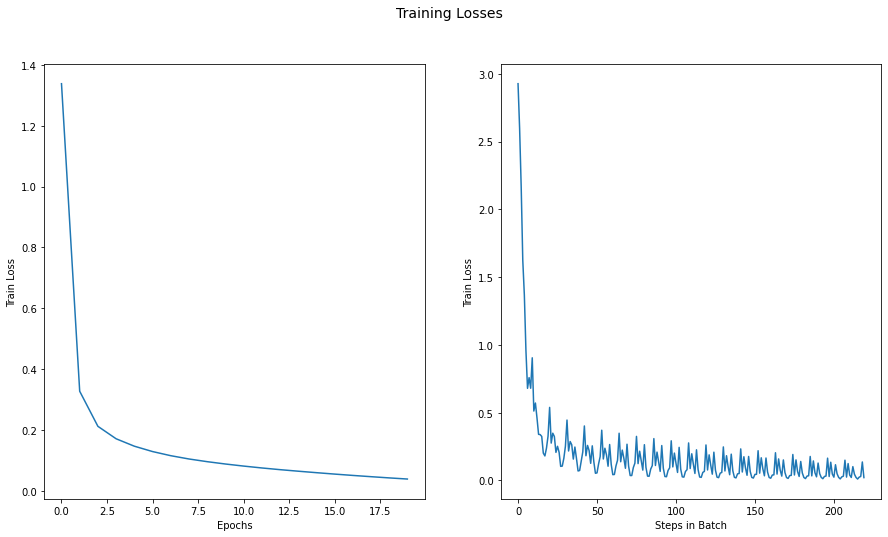

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
fig.suptitle("Training Losses", fontsize=14)
axes[0].plot(loss_avg_lst)
axes[1].plot(loss_log)
axes[0].set(xlabel="Epochs", ylabel="Train Loss")
axes[1].set(xlabel="Steps in Batch", ylabel="Train Loss")
plt.savefig("gdrive/My Drive/Preferences/CNN/pref_losses.png")
plt.show()
#fig.tight_layout()

# plt.figure(figsize=(10,8))
# plt.plot(loss_avg_lst)

# plt.figure(figsize=(10,8))
# plt.plot(loss_log)

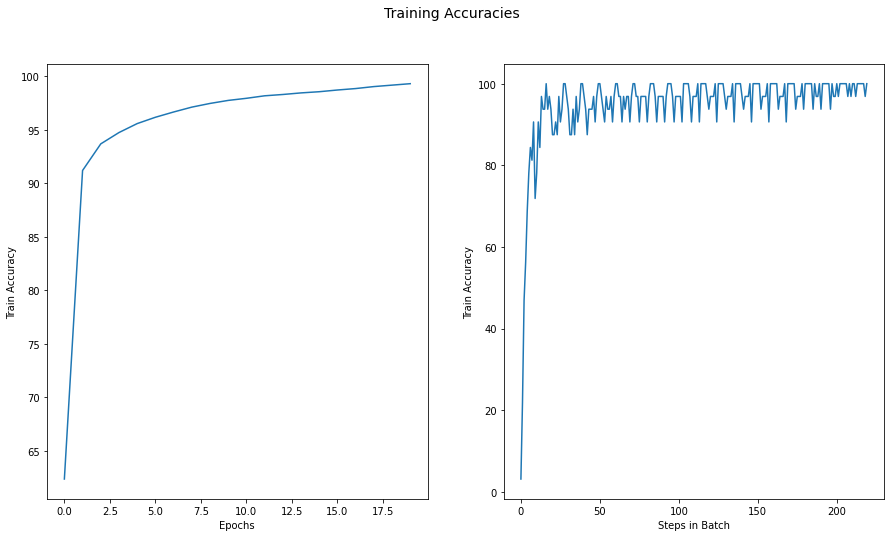

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
fig = plt.gcf()
fig.suptitle("Training Accuracies", fontsize=14)
axes[0].plot(acc_avg_lst)
axes[1].plot(train_acc)
axes[0].set(xlabel="Epochs", ylabel="Train Accuracy")
axes[1].set(xlabel="Steps in Batch", ylabel="Train Accuracy")
plt.savefig("gdrive/My Drive/Preferences/CNN/pref_accuracies.png")
plt.show()
#fig.tight_layout()

# plt.figure(figsize=(10,8))
# plt.plot(acc_avg_lst)

# plt.figure(figsize=(10,8))
# plt.plot(train_acc)

Test Model:

In [ ]:
model.eval()
with torch.no_grad():
  test_var = Variable(xtest)

  net_out = model(test_var.unsqueeze(1))
  test_pred = torch.max(net_out.data, 1)[1].numpy()
  test_acc = get_acc(test_pred, y_test)
print(100*'-')
print('Test Accuracy:', test_acc)
print(100*'-')

----------------------------------------------------------------------------------------------------
Test Accuracy: 97.22222222222221
----------------------------------------------------------------------------------------------------


In [ ]:
actual = y_test.tolist() 
predicted = test_pred
target_names = list(range(18))
conf_mat = confusion_matrix(actual, predicted, target_names)   
target_names = ['class 0', 'class 1', 'class 2']
print('Confusion Matrix :')
print(conf_mat) 
acc = accuracy_score(actual, predicted)
print ('Accuracy: %.3f'% acc) 
print(100*'-')
print()
print ('Classification report : ')
print (classification_report(actual, predicted, digits=3) )
print(100*'-')
f_score = f1_score(actual, predicted, average = None )

Confusion Matrix :
[[50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 58  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 45  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0 54  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 39  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  3  0  0  0 46  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 39  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 60  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 47  0]
 [ 0  0  0  

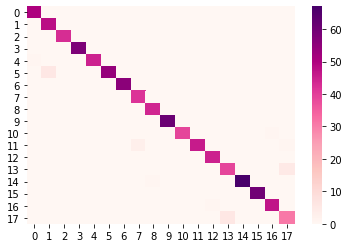

In [ ]:
ax= plt.subplot()
counts = ["{0:0.0f}".format(i) for i in conf_mat.flatten()]
percentages = ["{0:.2%}".format(i) for i in conf_mat.flatten()/np.sum(conf_mat)]
sns.heatmap(conf_mat, fmt='', cmap= 'RdPu')
ax.xaxis.set_ticklabels(list(range(18)))
ax.yaxis.set_ticklabels(list(range(18)))
plt.savefig("gdrive/My Drive/Preferences/CNN/pref_conf_mat.png")
plt.show()

In [ ]:
report = classification_report(actual, predicted, digits=3, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.980392,1.000000,0.990099,50.000000
1,0.888889,1.000000,0.941176,48.000000
2,1.000000,1.000000,1.000000,43.000000
3,1.000000,1.000000,1.000000,58.000000
4,1.000000,0.978261,0.989011,46.000000
5,1.000000,0.900000,0.947368,60.000000
6,1.000000,1.000000,1.000000,56.000000
7,0.933333,1.000000,0.965517,42.000000
8,0.977778,1.000000,0.988764,44.000000
9,1.000000,1.000000,1.000000,61.000000


In [ ]:
print(report_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &     support \\
\midrule
0            &   0.980392 &  1.000000 &  0.990099 &   50.000000 \\
1            &   0.888889 &  1.000000 &  0.941176 &   48.000000 \\
2            &   1.000000 &  1.000000 &  1.000000 &   43.000000 \\
3            &   1.000000 &  1.000000 &  1.000000 &   58.000000 \\
4            &   1.000000 &  0.978261 &  0.989011 &   46.000000 \\
5            &   1.000000 &  0.900000 &  0.947368 &   60.000000 \\
6            &   1.000000 &  1.000000 &  1.000000 &   56.000000 \\
7            &   0.933333 &  1.000000 &  0.965517 &   42.000000 \\
8            &   0.977778 &  1.000000 &  0.988764 &   44.000000 \\
9            &   1.000000 &  1.000000 &  1.000000 &   61.000000 \\
10           &   1.000000 &  0.975000 &  0.987342 &   40.000000 \\
11           &   1.000000 &  0.920000 &  0.958333 &   50.000000 \\
12           &   0.978261 &  1.000000 &  0.989011 &   45.000000 \\
13           &   0.866667 &  0.

In [ ]:
test_array_1 = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
test_array_2 = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])#


In [ ]:
test_array_3= np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
test_array_4 = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])#

In [ ]:
test_array_5 = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
test_array_6 = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
test_array_7 = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
def predict_preference(in_model, in_array, lookup, print_on):

  test_sample = torch.FloatTensor(in_array.tolist())
  in_model.eval()
  with torch.no_grad():
    test_var = Variable(test_sample)
    test_var = test_var.unsqueeze(0)

    net_out = in_model(test_var.unsqueeze(0))
    test_pred = torch.max(net_out.data, 1)[1].numpy()
    predicted_label = test_pred.item()
    if print_on:
      lookup_row = lookup[lookup['lbl_concat'] == predicted_label]
      w = lookup_row['Week'].item()
      d = lookup_row['Day'].item()
      b = lookup_row['b2b'].item()

      print(100*'-')
      print('Predictions:')
      print(100*'-')
      print()
      print('Predicted Label:',predicted_label)
      print('Time of week preference:', w)
      print('Time of day preference:', d)
      print('Back to back meetings (True/False):', b)
      print()
      print(100*'-')
      print()
      print(100*'-')
      plt.imshow(in_array)
      plt.yticks(ticks = list(range(7)), labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
      plt.xticks(ticks = list(range(24)),labels =  list(range(24)))
      plt.xlabel('Timeslot')
      plt.ylabel('Week Index')
    return test_pred.item()

----------------------------------------------------------------------------------------------------
Predictions:
----------------------------------------------------------------------------------------------------

Predicted Label: 0
Time of week preference: early
Time of day preference: early
Back to back meetings (True/False): True

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------


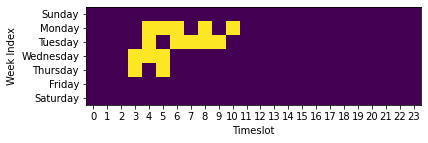

In [ ]:
predicted_label = predict_preference(model, test_array_2, df_lookup, True)
# plt.savefig("gdrive/My Drive/Preferences/0.png")
# plt.show()

----------------------------------------------------------------------------------------------------
Predictions:
----------------------------------------------------------------------------------------------------

Predicted Label: 3
Time of week preference: early
Time of day preference: late
Back to back meetings (True/False): False

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------


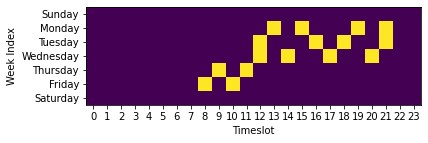

In [ ]:
predicted_label = predict_preference(model, test_array_1, df_lookup, True)
# plt.savefig("gdrive/My Drive/Preferences/3.png")
plt.show()

----------------------------------------------------------------------------------------------------
Predictions:
----------------------------------------------------------------------------------------------------

Predicted Label: 4
Time of week preference: early
Time of day preference: None
Back to back meetings (True/False): True

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------


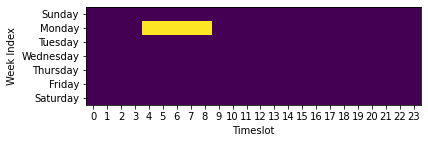

In [ ]:
predicted_label = predict_preference(model, test_array_4, df_lookup, True)
# plt.savefig("gdrive/My Drive/Preferences/4.png")
plt.show()

----------------------------------------------------------------------------------------------------
Predictions:
----------------------------------------------------------------------------------------------------

Predicted Label: 2
Time of week preference: early
Time of day preference: late
Back to back meetings (True/False): True

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------


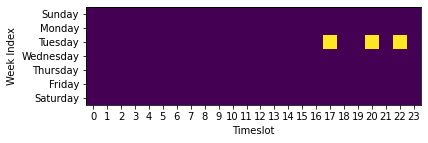

In [ ]:
predicted_label = predict_preference(model, test_array_5, df_lookup, True)
# plt.savefig("gdrive/My Drive/Preferences/5.png")
plt.show()

----------------------------------------------------------------------------------------------------
Predictions:
----------------------------------------------------------------------------------------------------

Predicted Label: 17
Time of week preference: None
Time of day preference: None
Back to back meetings (True/False): False

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------


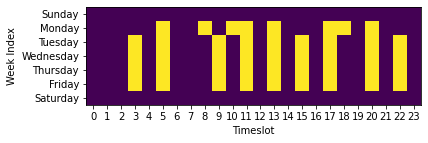

In [ ]:
predicted_label = predict_preference(model, test_array_6, df_lookup, True)

----------------------------------------------------------------------------------------------------
Predictions:
----------------------------------------------------------------------------------------------------

Predicted Label: 16
Time of week preference: None
Time of day preference: None
Back to back meetings (True/False): True

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------


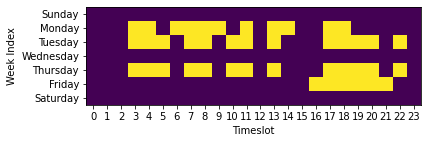

In [ ]:
predicted_label = predict_preference(model, test_array_7, df_lookup, True)

In [ ]:
#print(df_lookup.to_latex())